<a href="https://colab.research.google.com/github/bb20417/CE888/blob/main/Project/tweetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import important libraries

In [81]:
import pandas as pd
import numpy as np
import urllib.request
import csv
import matplotlib.pyplot as plt


In [82]:
import seaborn as sns
import re
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
from sklearn import svm



In [83]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


My chosen datasets are: **Offensive language identification, Hate speech detection and Emotion recongnition**

# Loading all the datasets.

Total 21 datasets

## Loading *Emotion datasets*

In [84]:

#traindf=pd.read_csv('../input/semeval-2018-task-ec/2018-E-c-En-train.txt',encoding='utf-8',sep="\t")
emo_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt",encoding='utf-8',sep="\t", header=None)
emo_train_text.columns= ["tweet_text"]
emo_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_train_label.columns= ["tweet_label"]


emo_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt",encoding='utf-8',sep="\t", header=None)
emo_val_text.columns= ["tweet_text"]
emo_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_val_label.columns= ["tweet_label"]

emo_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt",encoding='utf-8',sep="\t", header=None)
emo_test_text.columns= ["tweet_text"]
emo_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_test_label.columns= ["tweet_label"]

emo_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/mapping.txt",encoding='utf-8',sep="\t", header=None)
emo_map.columns= ["tweet_label","emotion"]


## Loading *Hate datasets*

In [85]:
#loading Hate speech data
hate_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt", sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_train_text.columns= ["tweet_text"]
hate_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt",encoding='utf-8',sep="\n", header=None)
hate_train_label.columns= ["tweet_label"]


hate_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt",sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_val_text.columns= ["tweet_text"]
hate_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt",encoding='utf-8',sep="\t", header=None)
hate_val_label.columns= ["tweet_label"]

hate_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt",sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_test_text.columns= ["tweet_text"]
hate_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt",encoding='utf-8',sep="\t", header=None)
hate_test_label.columns= ["tweet_label"]

hate_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/mapping.txt",encoding='utf-8',sep="\t", header=None)
hate_map.columns= ["tweet_label","isHate"]

## Loading *Offensive datasets*

In [86]:
#loading offensive data
off_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt",encoding='utf-8',sep="\t", header=None)
off_train_text.columns= ["tweet_text"]
off_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt",encoding='utf-8',sep="\t", header=None)
off_train_label.columns= ["tweet_label"]


off_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_text.txt",encoding='utf-8',sep="\t", header=None)
off_val_text.columns= ["tweet_text"]
off_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_labels.txt",encoding='utf-8',sep="\t", header=None)
off_val_label.columns= ["tweet_label"]

off_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_text.txt",encoding='utf-8',sep="\t", header=None)
off_test_text.columns= ["tweet_text"]
off_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_labels.txt",encoding='utf-8',sep="\t", header=None)
off_test_label.columns= ["tweet_label"]


off_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/mapping.txt",encoding='utf-8',sep="\t", header=None)
off_map.columns= ["tweet_label","offensive"]

# Cleaning methods used by all datasets

In [87]:
def clean_tweet(text):
  # "- Removing HTML tags
  #   - Removing punctuation
  #   - Lowering text
  #   "
  # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    return text


#clean_tweet("<div>This is not a sentence.<\div>").split()




In [88]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)



In [89]:
# Source of code: https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert/notebook

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



# **Emotion** dataset

## *Preprocessing*


In [90]:
#concatenating dataframe by columns to make one dataset each for train, validation and test df
df_emo_train = pd.concat([emo_train_text,emo_train_label], axis=1)
df_emo_val = pd.concat([emo_val_text,emo_val_label], axis=1)
df_emo_test = pd.concat([emo_test_text,emo_test_label], axis=1)

In [91]:
#joining mapping dataset with train, validation and test datasets
emo_combo_train = pd.merge(df_emo_train,emo_map, on='tweet_label')
emo_combo_val = pd.merge(df_emo_val,emo_map, on='tweet_label')
emo_combo_test = pd.merge(df_emo_test,emo_map, on='tweet_label')

In [92]:
# concatenating train and validation datasets by row to make one complete training data
emo_train_val = pd.concat([emo_combo_train,emo_combo_val])

In [93]:
train_emo = emo_train_val.copy()
train_emo['text_clean'] = train_emo['tweet_text'].apply(str).apply(lambda x: preprocess(x)) # text



In [94]:
#removing workds like user and amp in clean tweets
train_emo['text_clean'] = train_emo['text_clean'].str.replace('user','')
train_emo['text_clean'] = train_emo['text_clean'].str.replace('amp','')
train_emo['text_clean'] = train_emo['text_clean'].str.replace('@','')

train_emo

,tweet_text,tweet_label,emotion,text_clean
0,“Worry is a down payment on a problem you may ...,2,optimism,“Worry is a down payment on a problem you may ...
1,I saved him after ordering him to risk his lif...,2,optimism,I saved him after ordering him to risk his lif...
2,@user Uggh that's really horrible. You're not ...,2,optimism,Uggh that's really horrible. You're not a bad...
3,Love is when all your happiness and all your s...,2,optimism,Love is when all your happiness and all your s...
4,“ My courage always rises at every attempt to ...,2,optimism,“ My courage always rises at every attempt to ...
...,...,...,...,...
369,Alaina and I are at 90 days on our snap streak...,2,optimism,Alaina and I are at 90 days on our snap streak...
370,@user || I smell your fear.,2,optimism,|| I smell your fear.
371,@user @user @user Seems legit. I always flinch...,2,optimism,Seems legit. I always flinch right before I...
372,#faith is like #oil but #fear is like #dust ea...,2,optimism,#faith is like #oil but #fear is like #dust ea...


In [95]:
# Optimism tweet
print("Optimistic Tweet example :",emo_train_val[emo_train_val['emotion']=='optimism']['tweet_text'].values[0])
#Joy Tweet 
print("Joyous Tweet example :",emo_train_val[emo_train_val['emotion']=='joy']['tweet_text'].values[0])
#Anger tweet
print("Angry tweet example  :",emo_train_val[emo_train_val['emotion']=='anger']['tweet_text'].values[0]) 

#Sadness tweet
print("Sad tweet example  :",emo_train_val[emo_train_val['emotion']=='sadness']['tweet_text'].values[0]) 


Optimistic Tweet example : “Worry is a down payment on a problem you may never have'.  Joyce Meyer.  #motivation #leadership #worry 
Joyous Tweet example : No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu 
Angry tweet example  : My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs 
Sad tweet example  : it's pretty depressing when u hit pan on ur favourite highlighter 


## *Visualization*

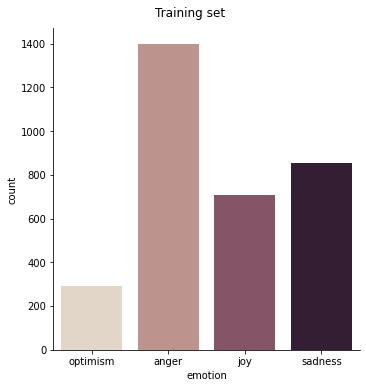

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

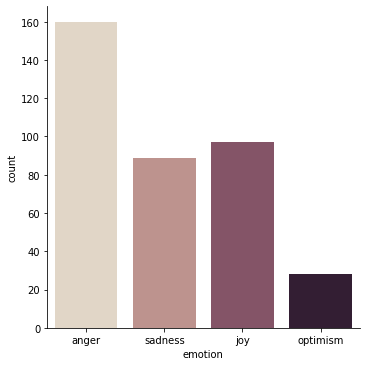

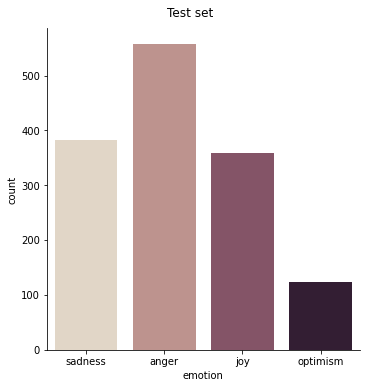

In [96]:
from google.colab import files
g = (sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_train))
g.fig.suptitle("Training set", y=1.03)
#g.savefig("emo_train1.png")
#files.download("emo_train1.png")
plt.show()

v = sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_val)
# v.fig.suptitle("Validation set", y=1.03)
# v.savefig("emo_val.png")
files.download("emo_val.png")
plt.show()

t = sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_test)
t.fig.suptitle("Test set", y=1.03)
# t.savefig("emo_test.png")
# files.download("emo_test.png")

plt.show()



all the three datasets are similarly unbalanced.

**Wordclouds**

In [97]:
#creating different datasets for different emotions
emo_sad = train_emo[train_emo['emotion'] == 'sadness']['text_clean']
emo_anger = train_emo[train_emo['emotion'] == 'anger']['text_clean']
emo_joy = train_emo[train_emo['emotion'] == 'joy']['text_clean']
emo_opt = train_emo[train_emo['emotion'] == 'optimism']['text_clean']

In [98]:
emo_sad

2402    it's pretty depressing when u hit pan on ur fa...
2403    Making that yearly transition from excited and...
2404    #NewYork: Several #Baloch &; Indian activists ...
2405    It’s possible changing meds is best not done w...
2406     oh I see. I've seen so many people mourn the ...
                              ...                        
244       whose customers love it. Imagine being a hac...
245          All and boy play n0 no play dull and mᴬkes. 
246                             Not of this one sadly! 😪 
247     Some 'friends' get bitter when it seems your l...
248     Very important thing for today: \n\nDo not #bu...
Name: text_clean, Length: 944, dtype: object

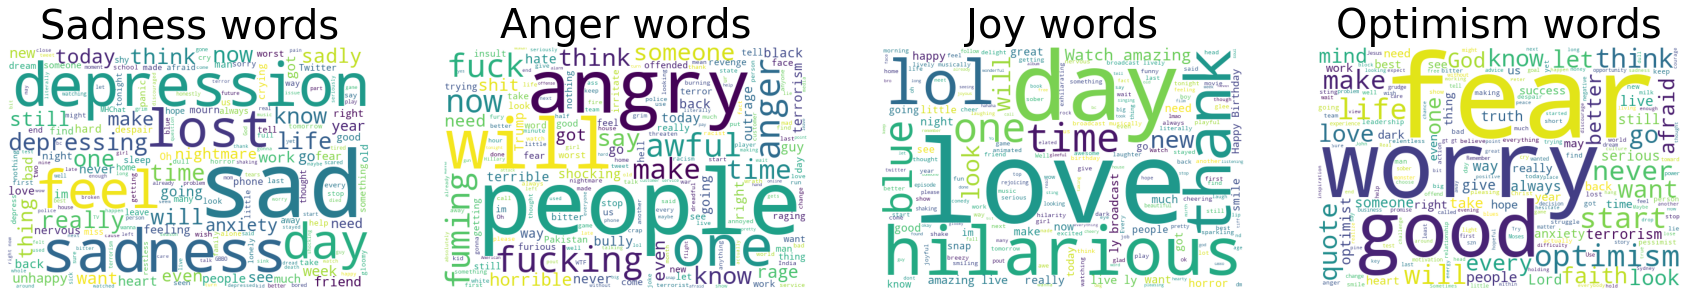

In [99]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[30, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_sad))
# wordcloud1.to_file('sad_cloud.png')
# files.download('sad_cloud.png')

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Sadness words',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_anger))
# wordcloud2.to_file('anger_cloud.png')
# files.download('anger_cloud.png')

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Anger words',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_joy))
# wordcloud3.to_file('joy_cloud.png')
# files.download('joy_cloud.png')

ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Joy words',fontsize=40);

wordcloud4 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_opt))
# wordcloud4.to_file('opt_cloud.png')
# files.download('opt_cloud.png')

ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('Optimism words',fontsize=40);


 

In [100]:
top_sad_words = get_top_n_words(emo_sad)
top_angry_words = get_top_n_words(emo_anger)
top_joy_words = get_top_n_words(emo_joy)
top_op_words = get_top_n_words(emo_opt)

s1 = [x[0] for x in top_sad_words[:20]]
s2 = [x[1] for x in top_sad_words[:20]]

a1 = [x[0] for x in top_angry_words[:20]]
a2 = [x[1] for x in top_angry_words[:20]]

j1 = [x[0] for x in top_joy_words[:20]]
j2 = [x[1] for x in top_joy_words[:20]]

o1 = [x[0] for x in top_op_words[:20]]
o2 = [x[1] for x in top_op_words[:20]]


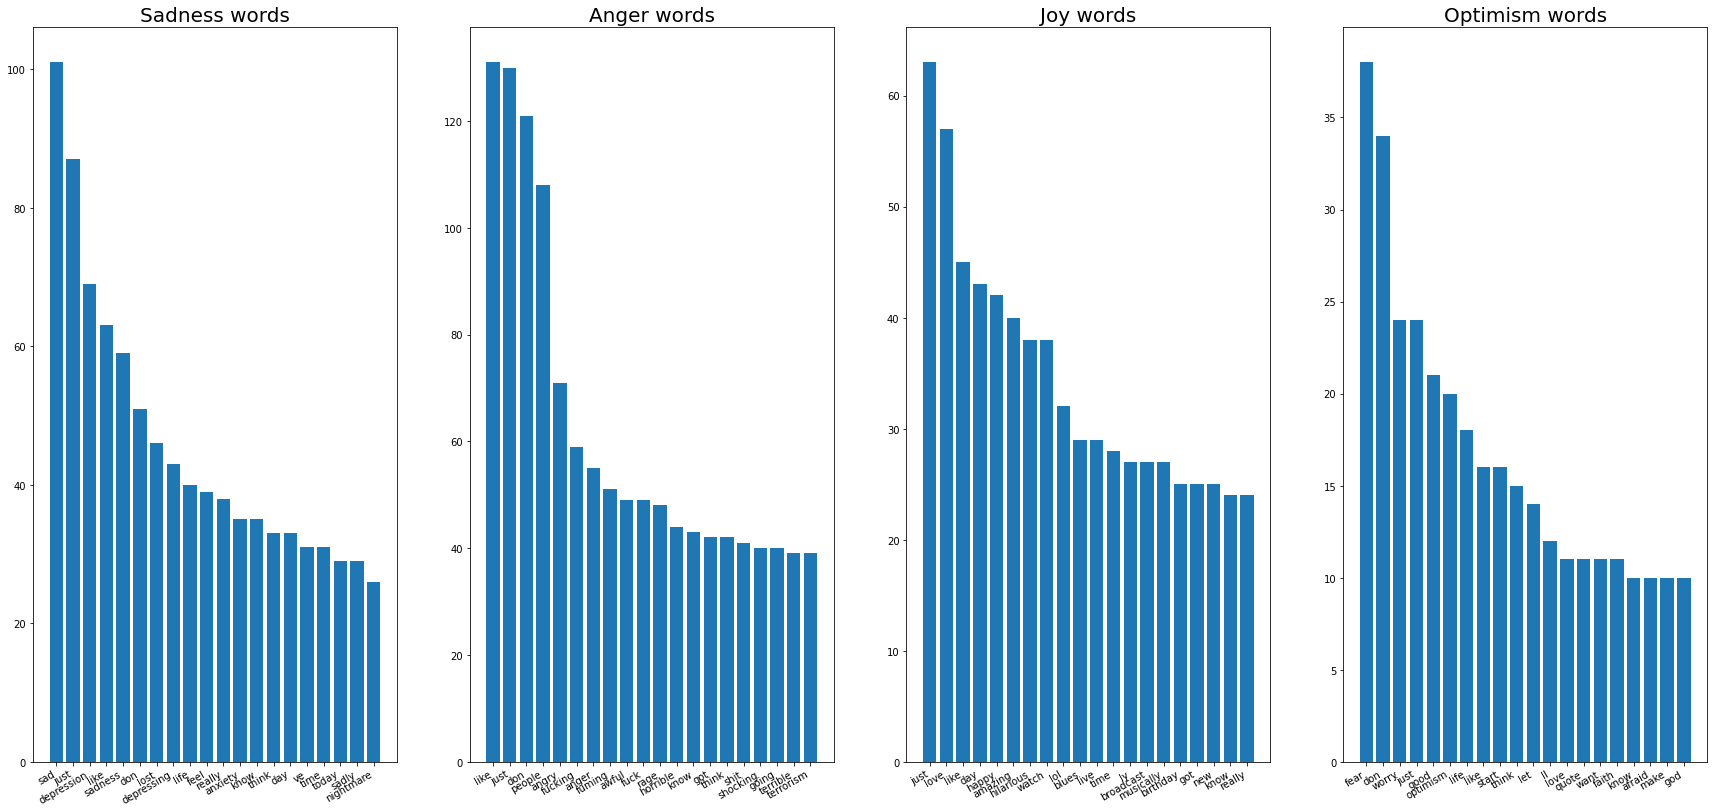

In [101]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[30, 15])
ax1.bar(s1, s2)
ax1.set_title('Sadness words',fontsize=20);
fig.autofmt_xdate()

ax2.bar(a1,a2)
ax2.set_title('Anger words',fontsize=20);
fig.autofmt_xdate()

ax3.bar(j1,j2)
ax3.set_title('Joy words',fontsize=20);
fig.autofmt_xdate()

ax4.bar(o1,o2)
ax4.set_title('Optimism words',fontsize=20);
fig.autofmt_xdate()



## *Training* the model and testing with macro averaged F1 score as evaluation metric.

**cleaning** the data and then using Linear SVM for inital training and testing

https://link.springer.com/chapter/10.1007/978-0-387-34747-9_18#enumeration

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5459006



Using BOW vectorizer from Python with countvectorizer from scikitlearn

In [102]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"]) 
test_features = vectorizer.transform(emo_combo_test["tweet_text"])
model = LinearSVC()
model.fit(training_features,emo_train_val["emotion"])
y_pred = model.predict(test_features)

score = f1_score(emo_combo_test["emotion"], y_pred, average='macro')
print("F1 Score on emotion dataset: {}".format(round(score*100,2)))

F1 Score on emotion dataset: 61.4


Taking n-gram: 

https://link.springer.com/chapter/10.1007/3-540-36618-0_24
https://www.researchgate.net/publication/2375544_N-Gram-Based_Text_Categorization



In [103]:
# modeling with countvectorizer and bigrams
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("F1 score on the IMDB dataset: {:.2f}".format(score*100))


F1 score on the IMDB dataset: 61.46


bigram also gave same result. next checking TF-IDF  vectorizer  with bigram

In [104]:

# modeling with TF-IDF and bigrams
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("F1 score on the IMDB dataset: {:.2f}".format(score*100))


F1 score on the IMDB dataset: 62.61


NOT  huge difference. Now trying the cleaning process given by tweeteval repository

In [105]:
# cleaning with process suggested by tweeteval  and then vectorizing with TF-IDF and bigrams to train emotion dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("F1 score Emotion dataset: {:.2f}".format(score*100))

F1 score Emotion dataset: 61.35


In [106]:
#cleaning with process suggested by tweeteval  and then vectorizing with countvectorizer with bigrams to train emotion dataset by SVM

vectorizer = CountVectorizer(#stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("F1 score on the emotion dataset: {:.2f}".format(score*100))

F1 score on the emotion dataset: 60.08


# **Hate Speech** dataset

## *Preprocessing*


In [107]:
#concatenating dataframe to make one dataset each for train, validation and test df
df_hate_train = pd.concat([hate_train_text,hate_train_label], axis=1)
df_hate_val = pd.concat([hate_val_text,hate_val_label], axis=1)
df_hate_test = pd.concat([hate_test_text,hate_test_label], axis=1)

In [108]:
hate_combo_train = pd.merge(df_hate_train,hate_map, on='tweet_label')
hate_combo_val = pd.merge(df_hate_val,hate_map, on='tweet_label')
hate_combo_test = pd.merge(df_hate_test,hate_map, on='tweet_label')

In [109]:
hate_train_val = pd.concat([hate_combo_train, hate_combo_val])

In [110]:
total =0
for n in pd.isna(hate_train_val["tweet_text"]):
  if n==True:
    total = total+1
total

8

In [111]:
hate_train_val.dropna(inplace=True) #dropping the empty tweets, total 8, as they were included during the reading part
hate_combo_test.dropna(inplace=True)

In [112]:
train_hate = hate_train_val.copy()
train_hate['text_clean'] = train_hate['tweet_text'].apply(str).apply(lambda x: preprocess(x))

In [113]:
#removing workds like user and amp in clean tweets
train_hate['text_clean'] = train_hate['text_clean'].str.replace('user','')
train_hate['text_clean'] = train_hate['text_clean'].str.replace('amp','')
train_hate['text_clean'] = train_hate['text_clean'].str.replace('@','')
train_hate

,tweet_text,tweet_label,isHate,text_clean
0,@user nice new signage. Are you not concerned ...,0,not-hate,nice new signage. Are you not concerned by Be...
1,Hysterical woman like @user,0,not-hate,Hysterical woman like
2,Me flirting- So tell me about your father...,0,not-hate,Me flirting- So tell me about your father...
3,The Philippine Catholic bishops' work for migr...,0,not-hate,The Philippine Catholic bishops' work for migr...
4,When cuffin season is finally over,0,not-hate,When cuffin season is finally over
...,...,...,...,...
995,"shut the fuck up you know youre that bitch, wh...",1,hate,"shut the fuck up you know youre that bitch, wh..."
996,Where the fuck is your face scary hoe? Dont be...,1,hate,Where the fuck is your face scary hoe? Dont be...
997,Pass #MeritBased Immigration. Kill #ChainMigra...,1,hate,Pass #MeritBased Immigration. Kill #ChainMigra...
998,I usually dont hate people but I actually hate...,1,hate,I usually dont hate people but I actually hate...


In [114]:
# Hate tweet
print("Hate Tweet example :",hate_train_val[hate_train_val['isHate']=='hate']['tweet_text'].values[0])
#Not-Hate Tweet 
print("Not Hate Tweet example :",hate_train_val[hate_train_val['isHate']=='not-hate']['tweet_text'].values[0])


Hate Tweet example : A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎 
Not Hate Tweet example : @user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… 


## *Visualization*

In [115]:
#creating different datasets for different emotions
hate_yes = train_hate[train_hate['isHate'] == 'hate']['text_clean']
hate_no = train_hate[train_hate['isHate'] == 'not-hate']['text_clean']


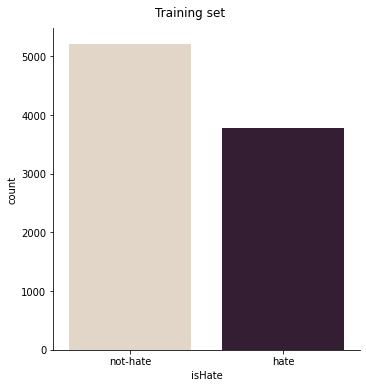

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

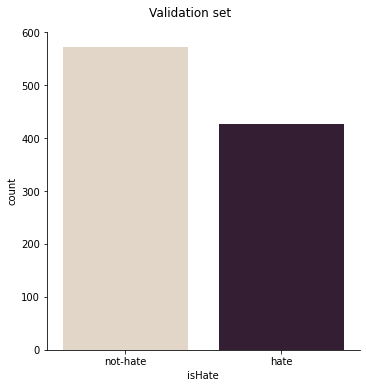

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

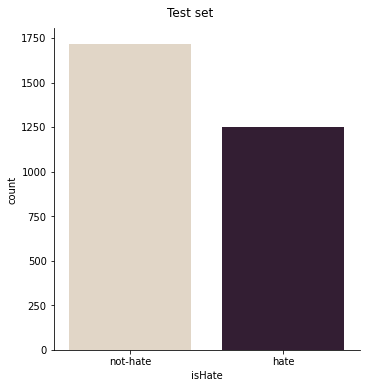

In [116]:
g = (sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_train))
g.fig.suptitle("Training set", y=1.03)
# g.savefig("hate_train.png")
# files.download("hate_train.png")
plt.show()

v = sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_val)
v.fig.suptitle("Validation set", y=1.03)
# v.savefig("hate_val.png")
# files.download("hate_val.png")
plt.show()

t = sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_test)
t.fig.suptitle("Test set", y=1.03)
# t.savefig("hate_test.png")
# files.download("hate_test.png")
plt.show()


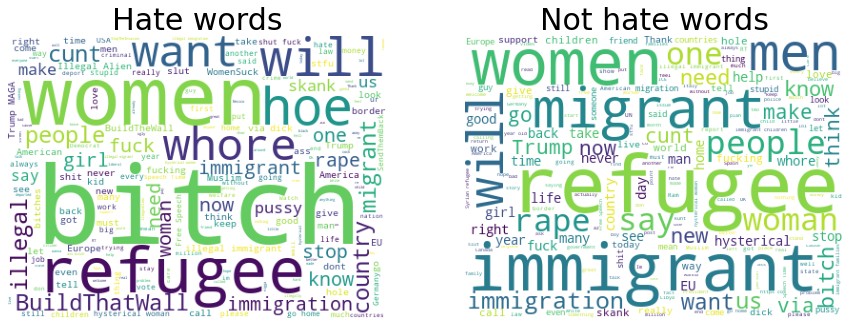

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=400,
                        height=300).generate(" ".join(hate_yes))
# wordcloud1.to_file('hate_cloud.png')
# files.download('hate_cloud.png')

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Hate words',fontsize=30);

wordcloud2 = WordCloud( background_color='white',
                        width=400,
                        height=300).generate(" ".join(hate_no))
# wordcloud2.to_file('not_hate_cloud.png')
# files.download('not_hate_cloud.png')
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not hate words',fontsize=30);


In [118]:
top_hate_words = get_top_n_words(hate_yes)
top_nonHate_words = get_top_n_words(hate_no)


s1 = [x[0] for x in top_hate_words[:20]]
s2 = [x[1] for x in top_hate_words[:20]]

a1 = [x[0] for x in top_nonHate_words[:20]]
a2 = [x[1] for x in top_nonHate_words[:20]]



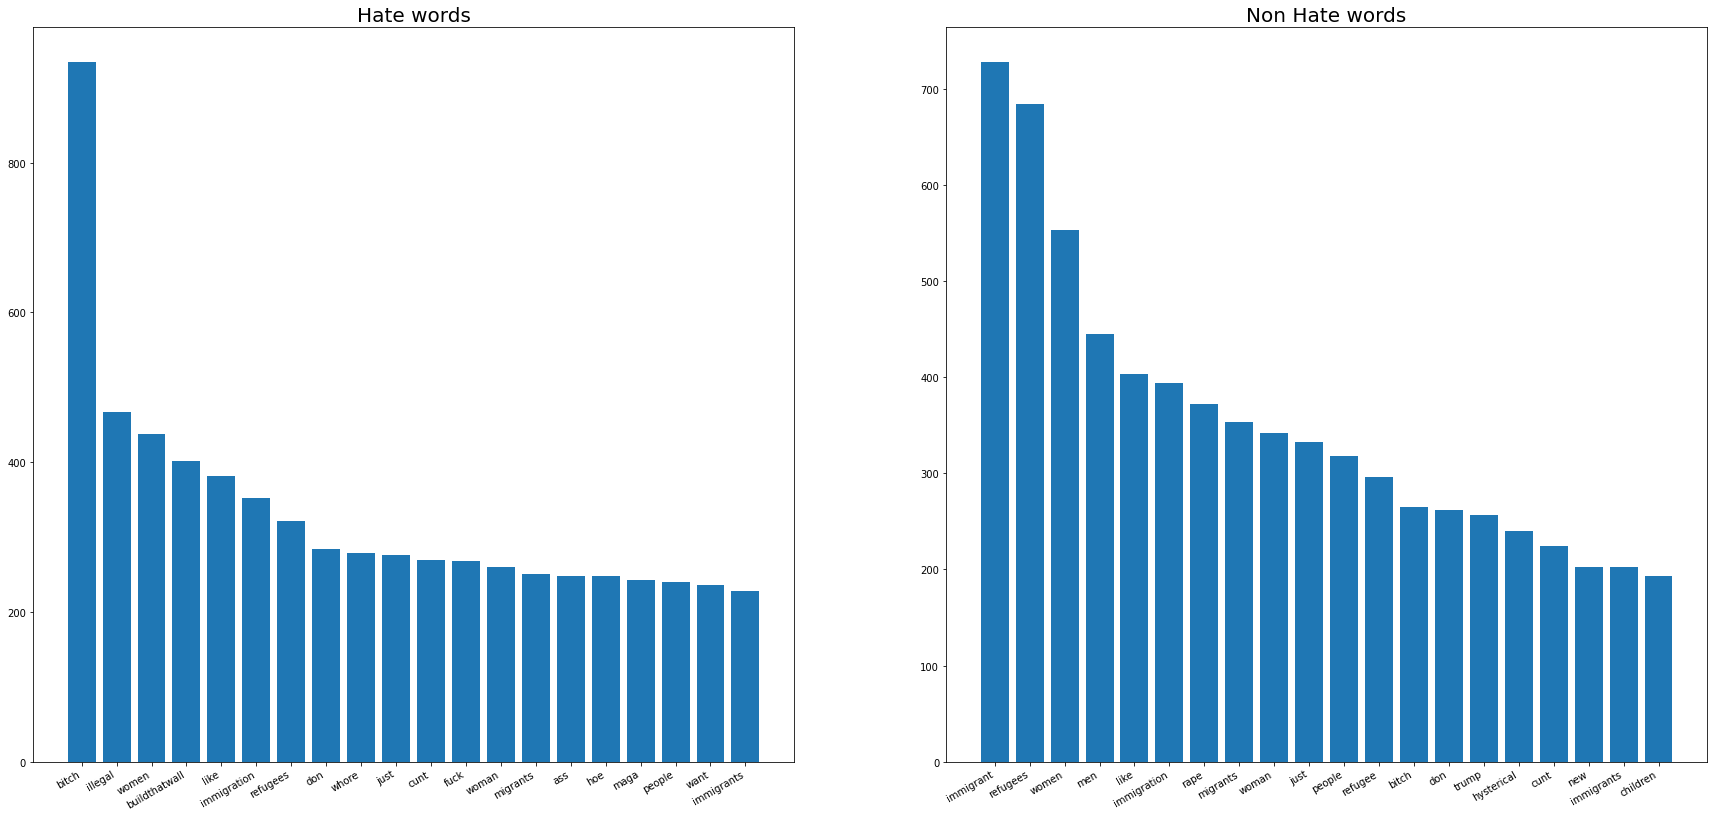

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])
ax1.bar(s1, s2)


ax1.set_title('Hate words',fontsize=20);
fig.autofmt_xdate()

ax2.bar(a1,a2)
ax2.set_title('Non Hate words',fontsize=20);
fig.autofmt_xdate()





## *Training* the model and testing with macro averaged F1 score as evaluation metric.

In [120]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)
training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])  # feature extraction of train and validation set
test_features = vectorizer.transform(hate_combo_test["tweet_text"]) #feature extraction of test set
model = LinearSVC()
model.fit(training_features,hate_train_val["isHate"])
y_pred = model.predict(test_features)

score = f1_score(hate_combo_test["isHate"], y_pred, average='macro')
print("F1 Score on hate detection dataset: {}".format(round(score*100,2)))


F1 Score on hate detection dataset: 49.37


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [121]:
# cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Hate dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("F1 score on the Hate dataset: {:.2f}".format(score*100))

F1 score on the Hate dataset: 39.54


In [122]:
# cleaning with proecss suggested by tweeteval  and then vectorizing with TF-IDF and bigrams hate dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("F1 score on the Hate detection dataset: {:.2f}".format(score*100))

F1 score on the Hate detection dataset: 41.38


In [123]:
# cleaning with proecss suggested by tweeteval  and then vectorizing with countvectorizer and bigrams hate dataset
vectorizer = CountVectorizer(#stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("F1 score on the Hate detection dataset: {:.2f}".format(score*100))

F1 score on the Hate detection dataset: 48.65


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best score is generated with countvectorizer, basic cleaning and wothout bigrams



# **Offensive** dataset 

## *Preprocessing*


In [124]:
#concatenating dataframe to make one dataset each for train, validation and test df
df_off_train = pd.concat([off_train_text,off_train_label], axis=1)
df_off_val = pd.concat([off_val_text,off_val_label], axis=1)
df_off_test = pd.concat([off_test_text,off_test_label], axis=1)

In [125]:
off_combo_train = pd.merge(df_off_train,off_map, on='tweet_label')
off_combo_val = pd.merge(df_off_val,off_map, on='tweet_label')
off_combo_test = pd.merge(df_off_test,off_map, on='tweet_label')

In [126]:
off_train_val = pd.concat([off_combo_train,off_combo_val])

In [127]:
train_off = off_train_val.copy()
train_off['text_clean'] = train_off['tweet_text'].apply(str).apply(lambda x: preprocess(x))

In [128]:
#removing workds like user and amp in clean tweets
train_off['text_clean'] = train_off['text_clean'].str.replace('user','')
train_off['text_clean'] = train_off['text_clean'].str.replace('amp','')
train_off['text_clean'] = train_off['text_clean'].str.replace('@','')

train_off

,tweet_text,tweet_label,offensive,text_clean
0,@user Bono... who cares. Soon people will unde...,0,not-offensive,Bono... who cares. Soon people will understan...
1,@user Get him some line help. He is gonna be j...,0,not-offensive,Get him some line help. He is gonna be just f...
2,@user @user She is great. Hi Fiona!,0,not-offensive,She is great. Hi Fiona!
3,@user @user @user @user @user @user @user @use...,0,not-offensive,"This is the VetsResistSquadron""..."
4,@user @user Lol. Except he’s the most successf...,0,not-offensive,Lol. Except he’s the most successful preside...
...,...,...,...,...
1319,@user @user @user Weak argument considering -...,1,offensive,Weak argument considering -GOP congressmen...
1320,@user Stop saying this shit you are not going ...,1,offensive,Stop saying this shit you are not going to do...
1321,@user @user @user @user @user Sorry to break i...,1,offensive,Sorry to break it to you but the god of t...
1322,. she. is the most powerful woman on this eart...,1,offensive,. she. is the most powerful woman on this eart...


In [129]:
# offensive tweet
print("Offensive Tweet example :",off_train_val[off_train_val['offensive']=='offensive']['tweet_text'].values[0])
#Not-offensive Tweet 
print("Non offensive Tweet example :",off_train_val[off_train_val['offensive']=='not-offensive']['tweet_text'].values[0])


Offensive Tweet example : @user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 
Non offensive Tweet example : @user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. 


## *Visualization*

In [130]:
#creating different datasets for different emotions
off_yes = train_off[train_off['offensive'] == 'offensive']['text_clean']
off_no = train_off[train_off['offensive'] == 'not-offensive']['text_clean']


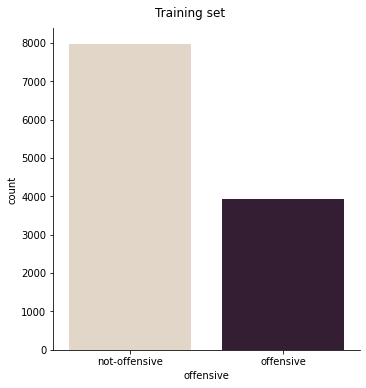

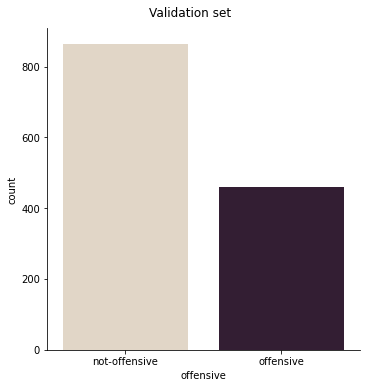

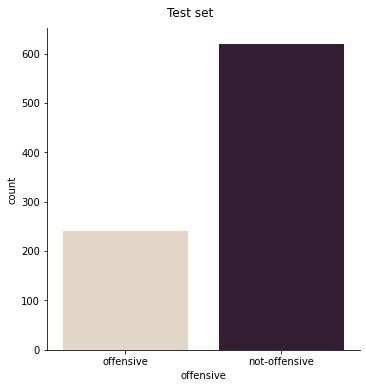

In [131]:
g = (sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_train))
g.fig.suptitle("Training set", y=1.03)
# g.savefig("off_train.png")
# files.download("off_train.png")
plt.show()

v = sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_val)
v.fig.suptitle("Validation set", y=1.03)
# v.savefig("off_val.png")
# files.download("off_val.png")
plt.show()

t = sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_test)
t.fig.suptitle("Test set", y=1.03)
# t.savefig("off_test.png")
#files.download("off_test.png")
plt.show()


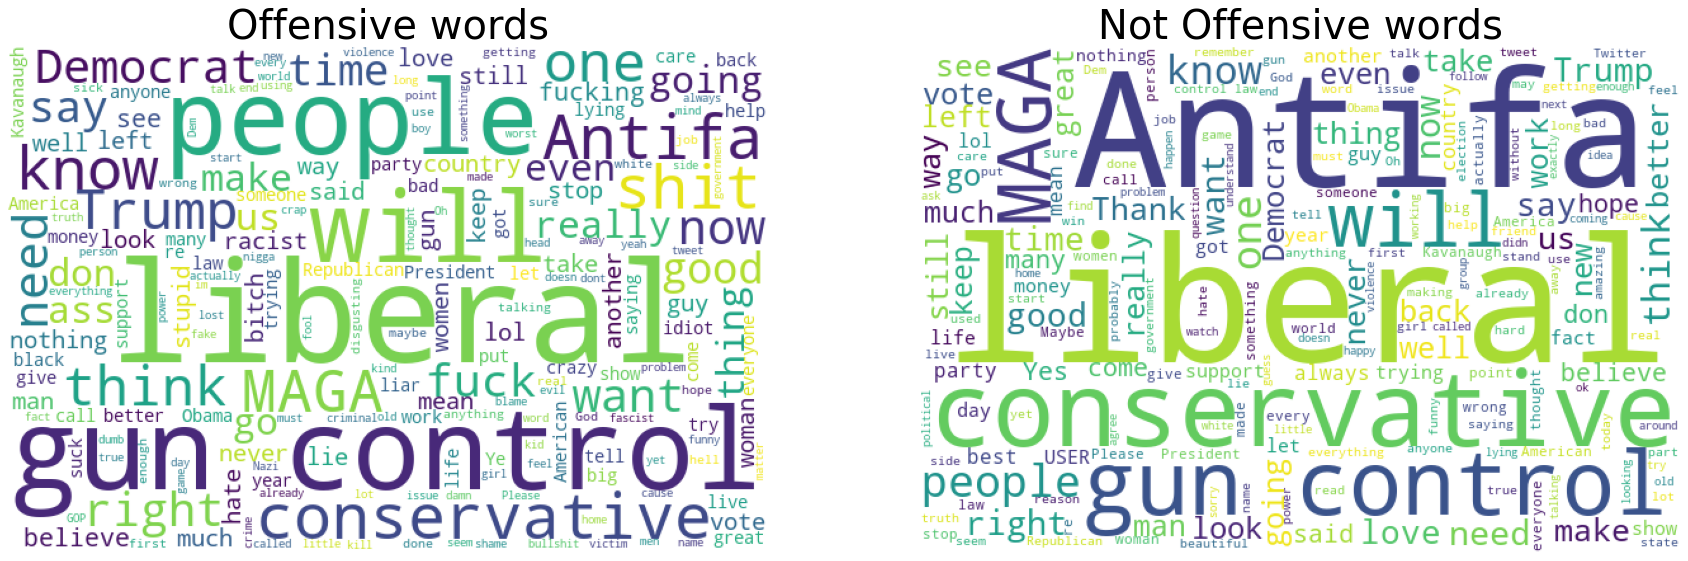

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(off_yes))
# wordcloud1.to_file('off_cloud.png')
# files.download('off_cloud.png')

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Offensive words',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(off_no))
# wordcloud2.to_file('non_off_cloud.png')
# files.download('non_off_cloud.png')
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not Offensive words',fontsize=40);

 

In [133]:
top_offensive_words = get_top_n_words(off_yes)
top_nonOff_words = get_top_n_words(off_no)


s1 = [x[0] for x in top_offensive_words[:20]]
s2 = [x[1] for x in top_offensive_words[:20]]

a1 = [x[0] for x in top_nonOff_words[:20]]
a2 = [x[1] for x in top_nonOff_words[:20]]



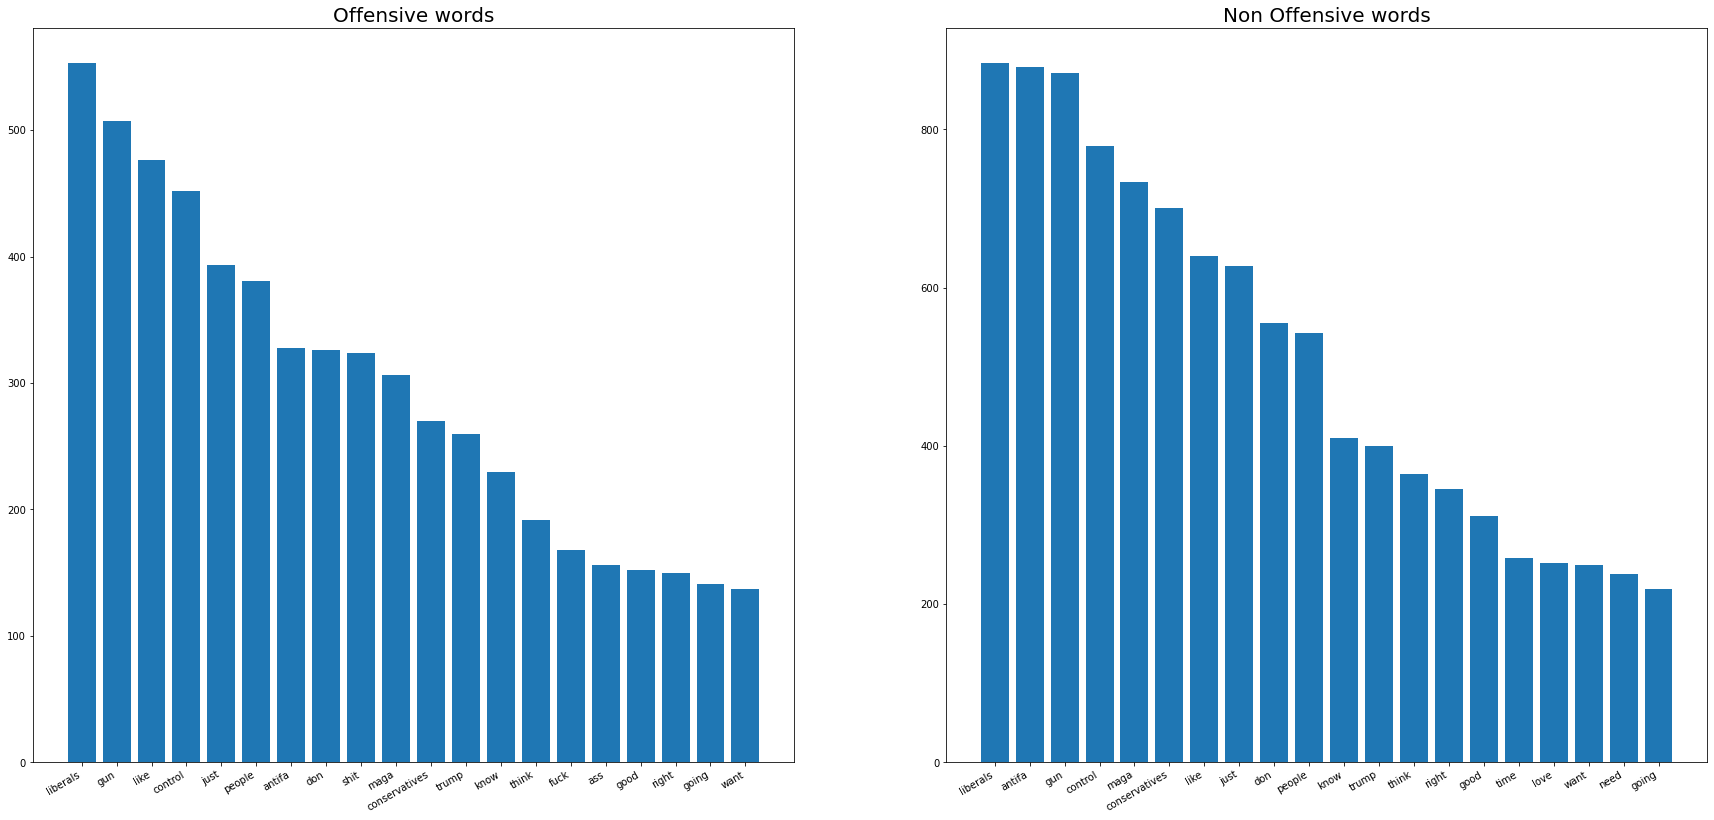

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])
ax1.bar(s1, s2)


ax1.set_title('Offensive words',fontsize=20);
fig.autofmt_xdate()

ax2.bar(a1,a2)
ax2.set_title('Non Offensive words',fontsize=20);
fig.autofmt_xdate()





## *Training* the model and testing with macro averaged F1 score as evaluation metric.

In [135]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])  # feature extraction of train and validation set
test_features = vectorizer.transform(off_combo_test["tweet_text"]) #feature extraction of test set

In [136]:

model = LinearSVC()
model.fit(training_features,off_train_val["offensive"])
y_pred = model.predict(test_features)

score = f1_score(off_combo_test["offensive"], y_pred, average='macro')
print("F1 Score on offensive language dataset: {}".format(round(score*100,2)))

F1 Score on offensive language dataset: 70.75


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [137]:
# cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Offensive dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation 
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("F1 score on the offensive language dataset: {:.2f}".format(score*100))

F1 score on the offensive language dataset: 74.00


In [138]:
# cleaning with  clean funtion given by tweeteval  and then vectorizing with countvectorizer and bigrams for Offensive dataset
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("F1 score on the offensive language dataset: {:.2f}".format(score*100))

F1 score on the offensive language dataset: 71.84


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [139]:
# cleaning with clean funtion given by tweeteval  and then vectorizing with TF-IDF and bigrams for Offensive dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("F1 score on the offensive language dataset: {:.2f}".format(score*100))

F1 score on the offensive language dataset: 73.17


cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Offensive dataset gives best score

# Further work

* Use Bert pre trained Model
* For preprocessing, use text embedding as suggested by Tweeteval
